In [1]:
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel("2013.xlsx")

In [4]:
print("Shape of dataframe df: {}".format(df.shape))

Shape of dataframe df: (1836, 5)


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1836 entries, 0 to 1835
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Year                 1836 non-null   int64
 1   Maximum length (m))  1836 non-null   int64
 2   Recession(m),        1836 non-null   int64
 3   Rate/yr(m)           1836 non-null   int64
 4   Snout altitude (m)   1836 non-null   int64
dtypes: int64(5)
memory usage: 71.8 KB


In [6]:
categorical = [col for col in df.columns if df[col].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 0 categorical variables


In [7]:
print('Number of unique Model Names: ', len(df['Snout altitude (m)'].unique()))
print('Number  of instances of models: ', len(df))

Number of unique Model Names:  72
Number  of instances of models:  1836


In [8]:
numerical = [col for col in df.columns if df[col].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 5 numerical variables


In [9]:
print(numerical)

['Year', 'Maximum length (m))', 'Recession(m),', 'Rate/yr(m)', 'Snout altitude (m)']


In [10]:
df[numerical].head()

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
0,2013,17581,258,39,3511
1,2013,17116,415,36,3556
2,2013,17168,308,13,3509
3,2013,17729,187,23,3535
4,2013,17326,389,30,3543


In [11]:
pd.options.display.float_format = '{:,.4f}'.format
corr_matrix = df.corr()
corr_matrix

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
Year,NaN,NaN,NaN,NaN,NaN
Maximum length (m)),NaN,1.0000,-0.0123,0.0381,-0.0224
"Recession(m),",NaN,-0.0123,1.0000,0.0009,-0.0103
Rate/yr(m),NaN,0.0381,0.0009,1.0000,0.0027
Snout altitude (m),NaN,-0.0224,-0.0103,0.0027,1.0000


In [12]:
corr_matrix['Maximum length (m))'].sort_values(ascending=False)

Maximum length (m))    1.0000
Rate/yr(m)             0.0381
Recession(m),         -0.0123
Snout altitude (m)    -0.0224
Year                      NaN
Name: Maximum length (m)), dtype: float64

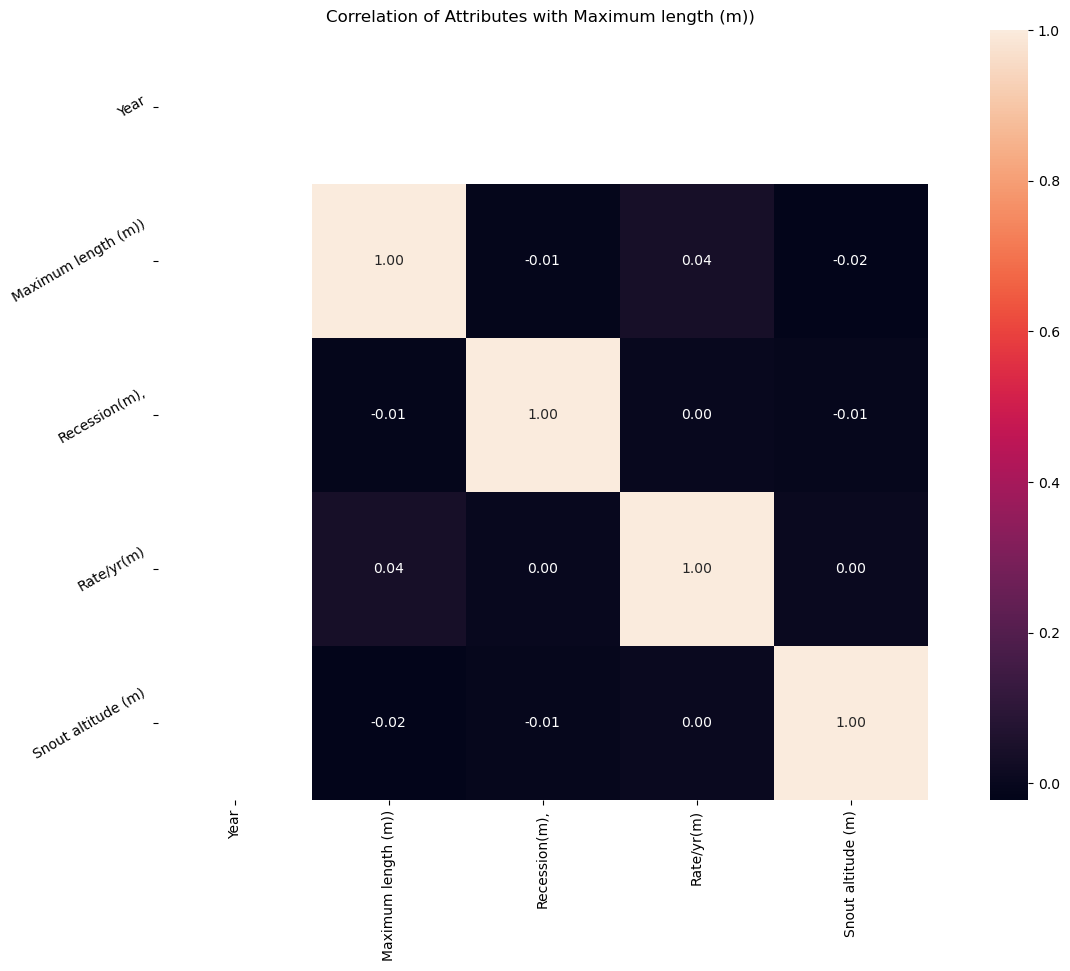

In [13]:
plt.figure(figsize=(16,10))
plt.title('Correlation of Attributes with Maximum length (m)) ')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

In [14]:
df.isnull().sum()

Year                   0
Maximum length (m))    0
Recession(m),          0
Rate/yr(m)             0
Snout altitude (m)     0
dtype: int64

In [15]:
df.describe()

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
count,"1,836.0000","1,836.0000","1,836.0000","1,836.0000","1,836.0000"
mean,"2,013.0000","17,539.7936",224.9080,27.3698,"3,531.9488"
std,0.0000,297.7923,129.1832,8.7631,20.5402
min,"2,013.0000","17,035.0000",0.0000,13.0000,"3,496.0000"
25%,"2,013.0000","17,278.5000",114.0000,20.0000,"3,514.0000"
50%,"2,013.0000","17,539.0000",226.0000,27.0000,"3,532.0000"
75%,"2,013.0000","17,791.5000",340.0000,35.0000,"3,550.0000"
max,"2,013.0000","18,067.0000",440.0000,42.0000,"3,567.0000"


In [16]:
for var in ['Year','Recession(m),','Rate/yr(m)','Snout altitude (m)']:
    print(df[var].value_counts() / np.float(len(df)))
    print()

2013   1.0000
Name: Year, dtype: float64

127   0.0060
411   0.0060
207   0.0054
265   0.0054
390   0.0054
       ...  
58    0.0005
202   0.0005
197   0.0005
292   0.0005
25    0.0005
Name: Recession(m),, Length: 435, dtype: float64

39   0.0419
30   0.0398
21   0.0392
31   0.0381
15   0.0381
42   0.0376
14   0.0370
23   0.0359
29   0.0354
32   0.0354
20   0.0349
19   0.0338
22   0.0338
16   0.0338
18   0.0338
28   0.0332
40   0.0332
27   0.0332
25   0.0327
13   0.0327
41   0.0327
38   0.0321
37   0.0316
17   0.0305
36   0.0289
34   0.0283
26   0.0272
24   0.0261
33   0.0245
35   0.0245
Name: Rate/yr(m), dtype: float64

3555   0.0240
3499   0.0202
3561   0.0202
3533   0.0196
3526   0.0196
        ...  
3565   0.0098
3500   0.0093
3551   0.0093
3554   0.0093
3496   0.0016
Name: Snout altitude (m), Length: 72, dtype: float64



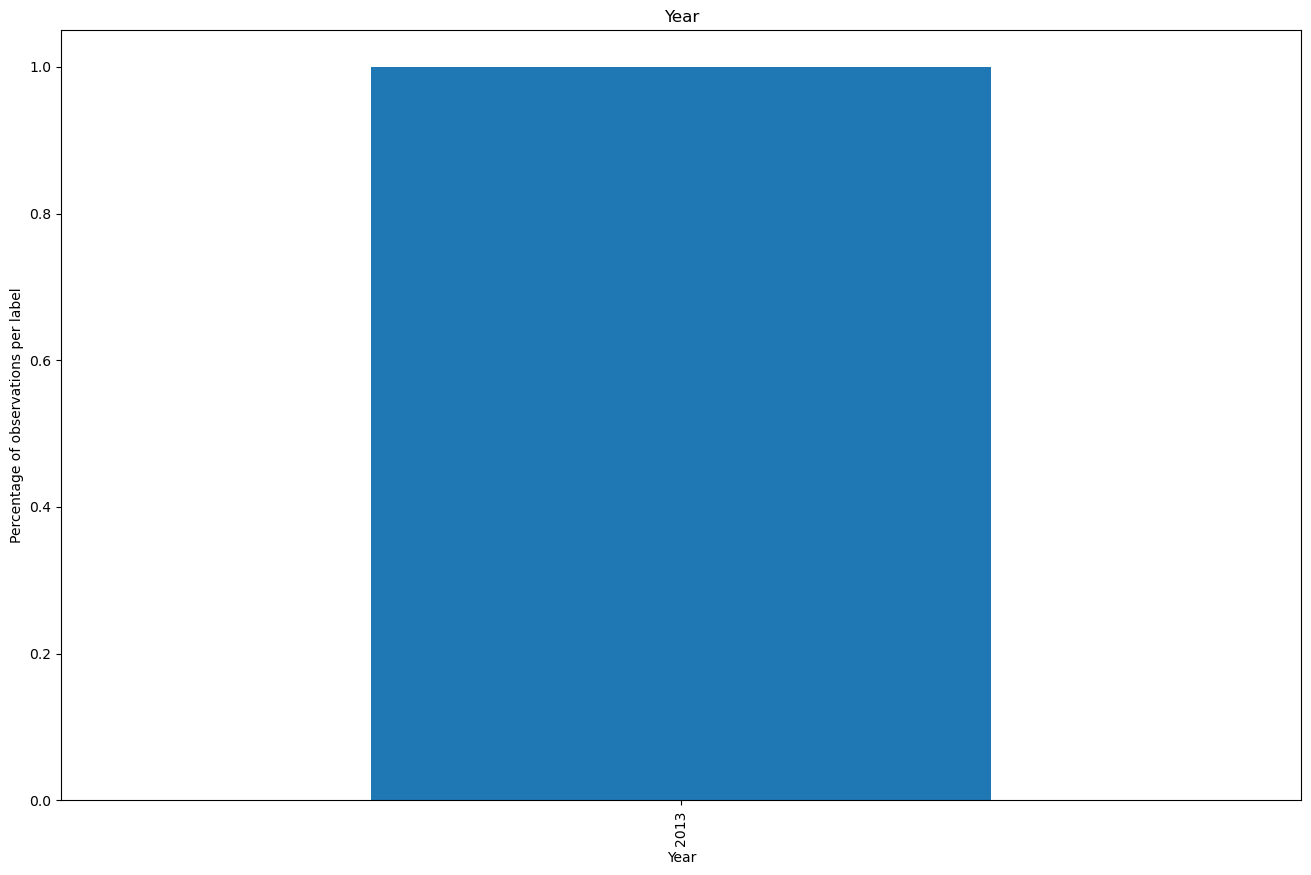

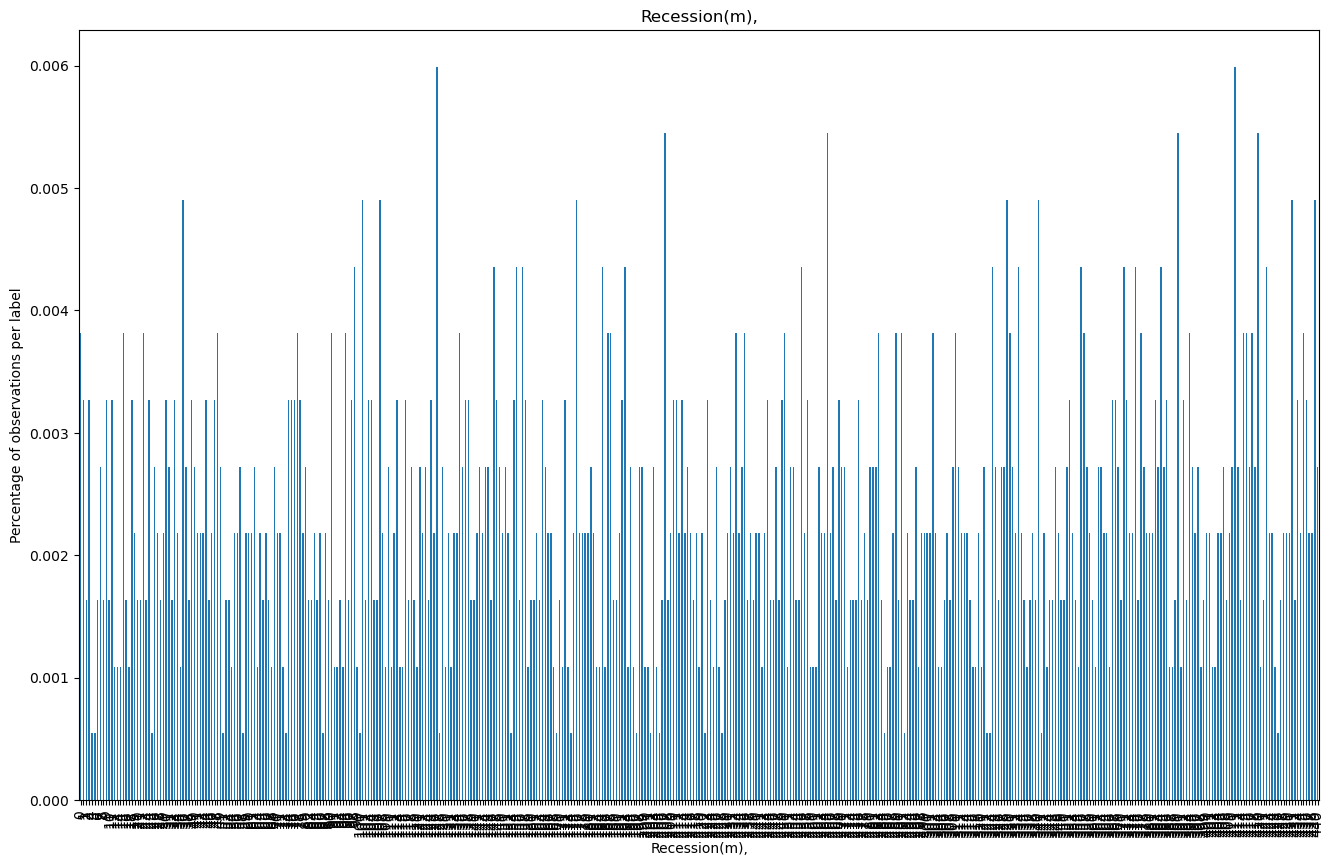

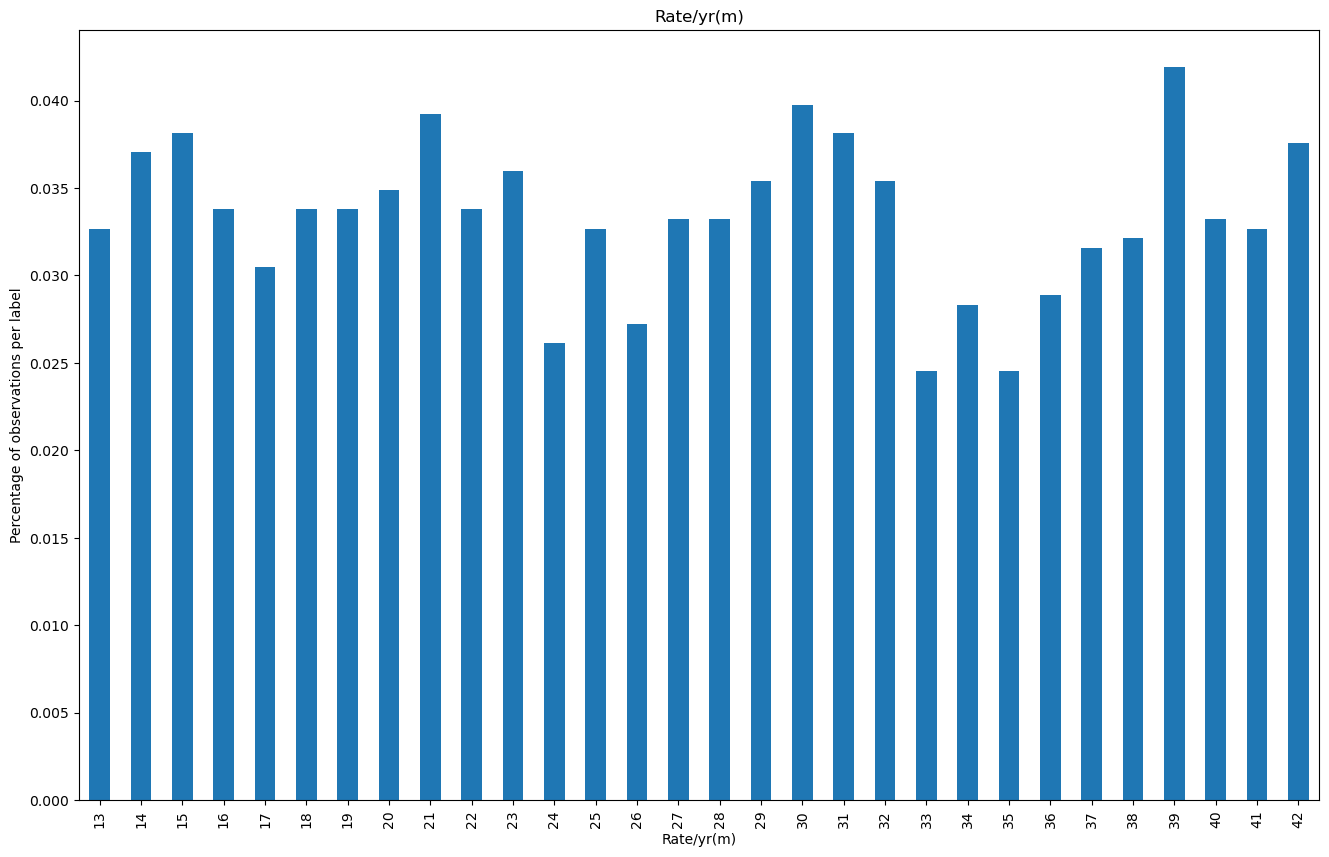

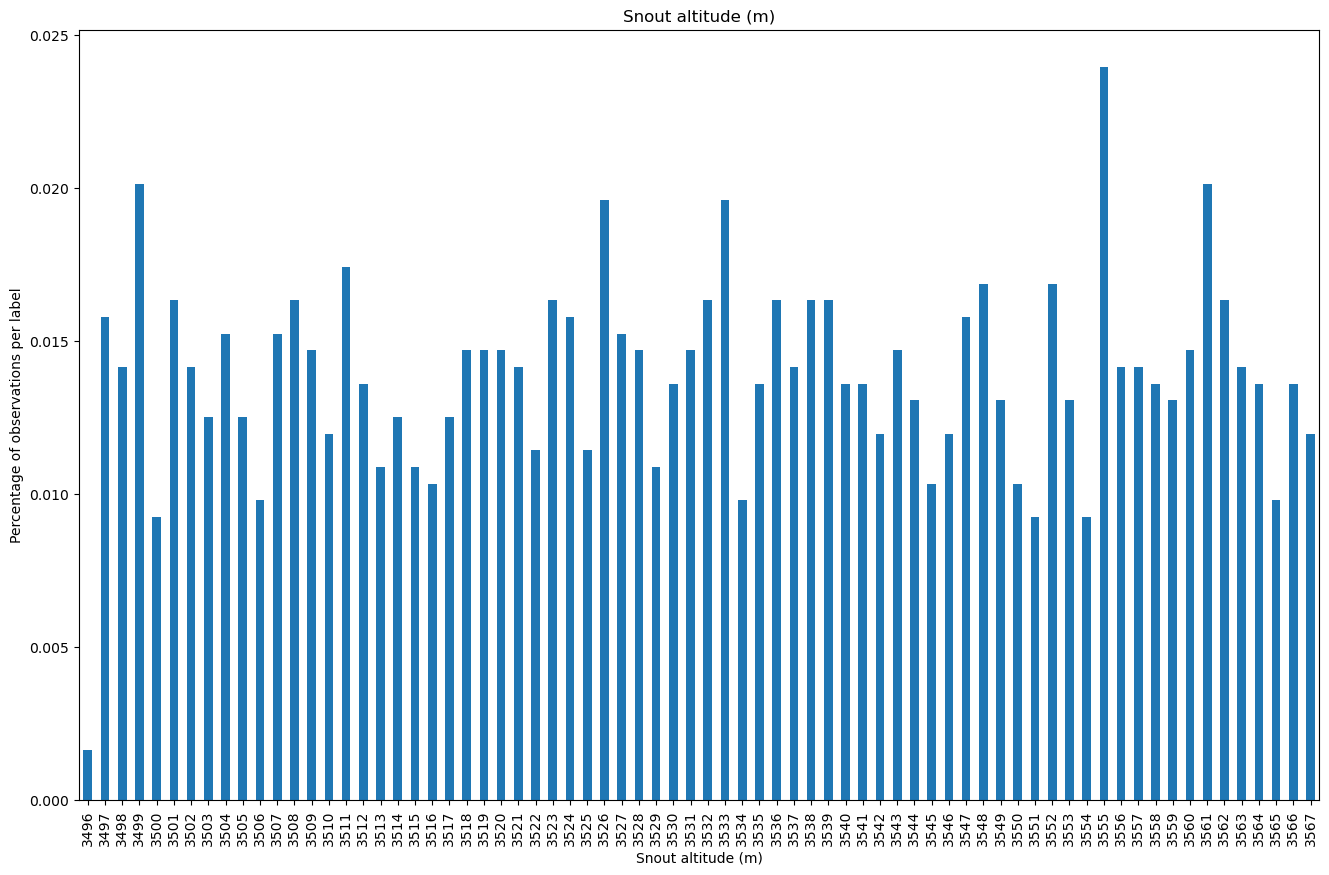

In [17]:
for var in ['Year','Recession(m),','Rate/yr(m)','Snout altitude (m)']:
    plt.figure(figsize=(16,10))
    (df.groupby(var)[var].count() / np.float(len(df))).plot.bar()
    plt.ylabel('Percentage of observations per label')
    plt.title(var)
    plt.show()